**Unsupervised learning: basics**
___
- How does Google group news articles?
- Labeled vs. unlabeled data?
    - Points without additional information given are unlabeled
- the goal of unsupervised learning is to find patterns and interpret any structures within the data
- clustering, anomaly detection, neural networks
- What is clustering?
    - process of grouping items with similar characteristics
    - items in groups more similar to each other than in other groups
___

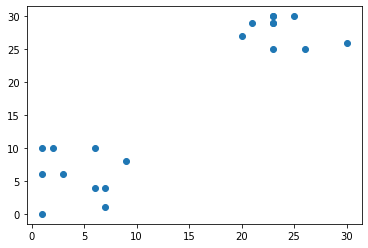

In [2]:
#Pokémon sightings

#There have been reports of sightings of rare, legendary Pokémon. You
#have been asked to investigate! Plot the coordinates of sightings to
#find out where the Pokémon might be. The X and Y coordinates of the
#points are stored in list x and y, respectively.


# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

**Basics of cluster analysis**
___
- **cluster** - A group of items with similar characteristics
    - Google News - articles where similar words and word associations appear together
    - Customer Segmentation
- **clustering algorithms**
    - hierarchical clustering
        - means are compared, after each step number of clusters is reduced by 1.
    - K means clustering
        - random cluster center is created for each cluster, and recalculated (centroids) a set number of times
    - DBSCAN, Gaussian methods

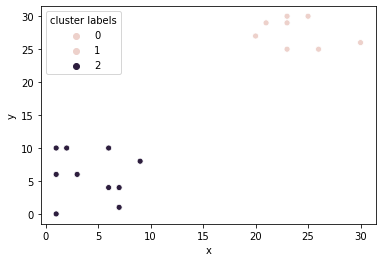

In [21]:
#Pokémon sightings: hierarchical clustering

#We are going to continue the investigation into the sightings of
#legendary Pokémon from the previous exercise. Remember that in the
#scatter plot of the previous exercise, you identified two areas
#where Pokémon sightings were dense. This means that the points seem
#to separate into two clusters. In this exercise, you will form two
#clusters of the sightings using hierarchical clustering.

from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

data_tuples = list(zip(x,y))
df = pd.DataFrame(data_tuples, columns=['x','y'])

# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distances
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
# There are some problems in matplotlib 3.3.1. hue='cluster_labels' does not work or add legend title. These need to be done manually
# see https://github.com/mwaskom/seaborn/issues/2194
sns.scatterplot(x='x', y='y', hue=df.cluster_labels.tolist(), data=df)
plt.legend(title='cluster labels')
plt.show()

#cluster label 0 can be removed if you store cluster labels as strings

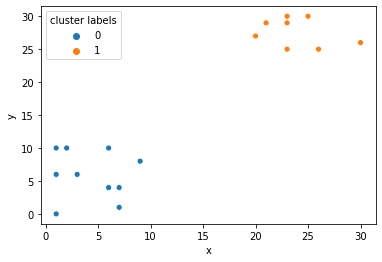

In [30]:
#Pokémon sightings: k-means clustering

#We are going to continue the investigation into the sightings of
#legendary Pokémon from the previous exercise. Just like the previous
#exercise, we will use the same example of Pokémon sightings. In this
#exercise, you will form clusters of the sightings using k-means
#clustering.

from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

#vq requires double or float type. Therefore type coercion is required
x = [float(i) for i in x]
y = [float(i) for i in y]

data_tuples = list(zip(x,y))
df = pd.DataFrame(data_tuples, columns=['x','y'])

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'],_ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue=df.cluster_labels.tolist(), data=df)
plt.legend(title='cluster labels')
plt.show()

**Data preparation for cluster analysis**
___
- Why do we need to prepare data for clustering?
    - variables have incomparable units
    - variables with same units have different scales and variances
    - data in raw form may lead to bias in clustering
    - clusters may be heavily dependent on one variable
- Solution: normalization of individual variables
- Normalization of data
    - process of rescaling data to a standard deviation of 1
    - x_new = x/std_dev(x)
    - from scipi.cluster.vq import whiten
___

In [31]:
#Normalize basic list data

#Now that you are aware of normalization, let us try to normalize
#some data. goals_for is a list of goals scored by a football team
#in their last ten matches. Let us standardize the data using the
#whiten() function.

# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)


[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


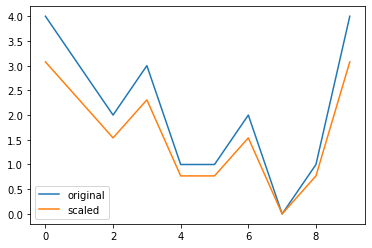

In [32]:
#Visualize normalized data

#After normalizing your data, you can compare the scaled data to
#the original data to see the difference.

from matplotlib import pyplot as plt
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

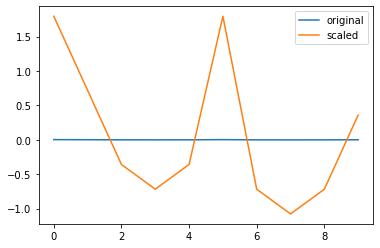

In [34]:
#Normalization of small numbers

#In earlier examples, you have normalization of whole numbers. In
#this exercise, you will look at the treatment of fractional numbers
#- the change of interest rates in the country of Bangalla over the years.

from matplotlib import pyplot as plt
from scipy.cluster.vq import whiten

# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

In [ ]:
#FIFA 18: Normalize data

#FIFA 18 is a football video game that was released in 2017 for PC and
#consoles. The dataset that you are about to work on contains data on
#the 1000 top individual players in the game. You will explore various
#features of the data as we move ahead in the course. In this exercise,
#you will work with two columns, eur_wage, the wage of a player in Euros
#and eur_value, their current transfer market value.

#The data for this exercise is stored in a Pandas dataframe, fifa.

#from matplotlib import pyplot as plt
#from scipy.cluster.vq import whiten

# Scale wage and value
#fifa['scaled_wage'] = whiten(fifa['eur_wage'])
#fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
#fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
#plt.show()

# Check mean and standard deviation of scaled values
#print(fifa[['scaled_wage', 'scaled_value']].describe())

#################################################
#<script.py> output:
#           scaled_wage  scaled_value
#    count      1000.00       1000.00
#    mean          1.12          1.31
#    std           1.00          1.00
#    min           0.00          0.00
#    25%           0.47          0.73
#    50%           0.85          1.02
#    75%           1.41          1.54
#    max           9.11          8.98
#################################################

![_images/12.1.svg](_images/12.1.svg)

**Basics of hierarchical clustering**
___
- create a distance matrix using scipy.cluster.hierarchy.linkage
    - parameters:
        - **observations** - data
        - **method** - how to calculate the proximity of clusters
            - *single* - based on two closest objects
            - *complete* - based on two farthest objects
            - *average* - based on arithmetic mean of all objects
            - *centroid* - based on geometric mean of all objects
            - *median* - based on the median of all objects
            = *ward* - based on the sum of squares
        - **metric** - distance metric
        - **optimal ordering** - boolean
- create cluster labels using scipy.cluster.hierarchy.fcluster
    - parameters:
        - **distance_matrix** - output of linkage() method
        - **num_clusters** - number of clusters
        - **criterion** - how to decide thresholds to form clusters
___

In [ ]:
#Hierarchical clustering: ward method

#It is time for Comic-Con! Comic-Con is an annual comic-based convention
#held in major cities in the world. You have the data of last year's
#footfall, the number of people at the convention ground at a given
#time. You would like to decide the location of your stall to maximize
#sales. Using the ward method, apply hierarchical clustering to find
#the two points of attraction in the area.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time.

# Import the fcluster and linkage functions
#from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
#distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
#comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
#sns.scatterplot(x='x_scaled', y='y_scaled',
#                hue='cluster_labels', data = comic_con)
#plt.show()

![_images/12.2.svg](_images/12.2.svg)

In [ ]:
#Hierarchical clustering: single method

#Let us use the same footfall dataset and check if any changes are
#seen if we use a different method for clustering.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time.

# Import the fcluster and linkage functions
#from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
#distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
#comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
#sns.scatterplot(x='x_scaled', y='y_scaled',
#                hue='cluster_labels', data = comic_con)
#plt.show()

![_images/12.3.svg](_images/12.3.svg)

In [ ]:
#Hierarchical clustering: complete method

#For the third and final time, let us use the same footfall dataset
#and check if any changes are seen if we use a different method for
#clustering.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time.

# Import the fcluster and linkage functions
#from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
#distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
#comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
#sns.scatterplot(x='x_scaled', y='y_scaled',
#                hue='cluster_labels', data = comic_con)
#plt.show()

![_images/12.4.svg](_images/12.4.svg)

**Visualize clusters**
___
- Why visualize clusters?
    - try to make sense of clusters formed
    - an additional step in validation of clusters
    - spot trends in data


In [ ]:
#Visualize clusters with matplotlib

#We have discussed that visualizations are necessary to assess the
#clusters that are formed and spot trends in your data. Let us now
#focus on visualizing the footfall dataset from Comic-Con using the
#matplotlib module.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time. cluster_labels has the cluster labels.
#A linkage object is stored in the variable distance_matrix.

#Import the pyplot class
#from matplotlib import pyplot as plt

# Define a colors dictionary for clusters
#colors = {1:'red', 2:'blue'}

# Plot a scatter plot
#comic_con.plot.scatter(x='x_scaled',
#                	   y='y_scaled',
#                       c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
#plt.show()

![_images/12.5.svg](_images/12.5.svg)

In [ ]:
#Visualize clusters with seaborn

#Let us now visualize the footfall dataset from Comic Con using the
#seaborn module. Visualizing clusters using seaborn is easier with
#the hue function for cluster labels.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time. cluster_labels has the cluster
#labels. A linkage object is stored in the variable distance_matrix.

# Import the seaborn module
#import seaborn as sns

# Plot a scatter plot using seaborn
#sns.scatterplot(x='x_scaled',
#                y='y_scaled',
#                hue='cluster_labels',
#                data=comic_con)
#plt.show()

![_images/12.6.svg](_images/12.6.svg)

**How many clusters?**
___
- introduction to dendrograms
- from scipy.cluster.hierarchy import dendrogram
___

In [ ]:
#Create a dendrogram

#Dendrograms are branching diagrams that show the merging of clusters
#as we move through the distance matrix. Let us use the Comic Con
#footfall data to create a dendrogram.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time. cluster_labels has the cluster
#labels. A linkage object is stored in the variable distance_matrix.

# Import the dendrogram function
#from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
#dn = dendrogram(distance_matrix)

# Display the dendogram
#plt.show()

![_images/12.7.svg](_images/12.7.svg)

**Limitations of hierarchical clustering**
___
- measuring speed in hierarchical clustering
    - *timeit* module
    - measure speed of *.linkage()* module
- there is a quadratic increase in runtime, making it infeasible for large data sets
___

In [ ]:
#FIFA 18: exploring defenders

#In the FIFA 18 dataset, various attributes of players are present.
#Two such attributes are:

#sliding tackle: a number between 0-99 which signifies how accurate
#a player is able to perform sliding tackles

#aggression: a number between 0-99 which signifies the commitment
#and will of a player

#These are typically high in defense-minded players. In this exercise,
#you will perform clustering based on these attributes in the data.

#This data consists of 5000 rows, and is considerably larger than
#earlier datasets. Running hierarchical clustering on this data can
#take up to 10 seconds.

#The following modules are pre-loaded: dendrogram, linkage, fcluster
#from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as
#sns. The data is stored in a Pandas dataframe, fifa.

# Fit the data into a hierarchical clustering algorithm
#distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
#fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
#print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
#sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
#plt.show()

#################################################
#<script.py> output:
#                   scaled_sliding_tackle  scaled_aggression
#    cluster_labels
#    1                                2.99               4.35
#    2                                0.74               1.94
#    3                                1.34               3.62
#################################################

![_images/12.8.svg](_images/12.8.svg)

**Basics of k-means clustering**
___
- Why k-means clustering?
    - a critical drawback of hierarchical clustering: runtime
    - K means runs significantly faster on large datasets
- Step 1: Generate cluster centers
    - kmeans(obs, k_or_guess, iter, thresh, check_finite)
        - obs: - standardized observations
        - k_or_guess: - number of clusters
        - iter: - number of iterations (default 20)
        - thresh: - threshold based on distortions (default 1e-05)
        - check_finite: - whether to check if observations contain only finite numbers (default: True)
    - returns two objects: cluster centers (code_book), distortion
    - how is distortion calculated?
        - sum of square distances between data points and cluster centers
- Step 2: Generate cluster labels
    - vq(obs, code_book, check_finite=True)
        - obs: - standardized observations
        - code_book: - cluster centers
        - check_finite - whether to check if observations contain only finite numbers (default: True)
    -  returns two objects: a  list of cluster labels, a list of distortions
- A note on distortions
    - kmeans - returns a single value of distortions based on the data
    - vq - returns a list of distortions one for each data point (mean approximates kmeans distortion)
___

In [ ]:
#K-means clustering: first exercise
#This exercise will familiarize you with the usage of k-means
#clustering on a dataset. Let us use the Comic Con dataset and check
#how k-means clustering works on it.

#Recall the two steps of k-means clustering:

#Define cluster centers through kmeans() function. It has two required
#arguments: observations and number of clusters.
#Assign cluster labels through the vq() function. It has two required
#arguments: observations and cluster centers.
#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time.

# Import the kmeans and vq functions
#from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
#cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
#comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
#sns.scatterplot(x='x_scaled', y='y_scaled',
#                hue='cluster_labels', data = comic_con)
#plt.show()

#NOTE: runtime is 50 ms vs 5 seconds for hierarchical clustering

![_images/12.9.svg](_images/12.9.svg)

**How many clusters?**
___
- How to find the right k?
    - no absolute method to find right number of clusters (k) in k-means clustering
- elbow plot method
    - line plot between cluster centers (x-axis) and distortion (y-axis)
    - elbow plot helps indicate number of clusters present in data
    - only gives an indication of optimal k (numbers of clusters)
    - does not always pinpoint how many k (numbers of clusters)
    - other methods: average silhouette, gap statistic
- distortions revisited
    - sum of squares between each data point and cluster center for each cluster
    - decreases with an increasing number of clusters
        - becomes zero when the number of clusters equals the number of points
___

In [ ]:
#Elbow method on distinct clusters
#Let us use the comic con data set to see how the elbow plot looks
#on a data set with distinct, well-defined clusters. You may want
#to display the data points before proceeding with the exercise.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y coordinates
#of people at a given point in time.

#distortions = []
#num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
#for i in num_clusters:
#    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
#    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
#elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
#sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
#plt.xticks(num_clusters)
#plt.show()

![_images/12.10.svg](_images/12.10.svg)

In [ ]:
#Elbow method on uniform data
#In the earlier exercise, you constructed an elbow plot on data with
#well-defined clusters. Let us now see how the elbow plot looks on a
#data set with uniformly distributed points. You may want to display
#the data points on the console before proceeding with the exercise.

#The data is stored in a Pandas data frame, uniform_data. x_scaled
#and y_scaled are the column names of the standardized X and Y
#coordinates of points.

#distortions = []
#num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
#for i in num_clusters:
#    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
#    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
#elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
#sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
#plt.xticks(num_clusters)
#plt.show()

![_images/12.11.svg](_images/12.11.svg)

**Limitations of k-means clustering**
___
- How to find the right number of k (number of clusters)?
- impact of seeds
    - set random number generator seed for consistency across multiple iteration of same code
    - *from numpy import random* \\ *random.seed(12)*
- biased towards equal sized clusters
    - hierarchical clustering does not

In [ ]:
#Impact of seeds on distinct clusters
#You noticed the impact of seeds on a dataset that did not have
#well-defined groups of clusters. In this exercise, you will explore
#whether seeds impact the clusters in the Comic Con data, where the
#clusters are well-defined.

#The data is stored in a Pandas data frame, comic_con. x_scaled and
#y_scaled are the column names of the standardized X and Y
#coordinates of people at a given point in time.

# Import random class
#from numpy import random

# Initialize seed
#random.seed(0)

# Run kmeans clustering
#cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
#comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
#sns.scatterplot(x='x_scaled', y='y_scaled',
#                hue='cluster_labels', data = comic_con)
#plt.show()

![_images/12.12.svg](_images/12.12.svg)

In [ ]:
#Change your code from the earlier step so that the seed is
#initialized with a list [1, 2, 1000].

# Import random class
#from numpy import random

# Initialize seed
#random.seed([1, 2, 1000])

# Run kmeans clustering
#cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
#comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
#sns.scatterplot(x='x_scaled', y='y_scaled',
#                hue='cluster_labels', data = comic_con)
#plt.show()

![_images/12.13.svg](_images/12.13.svg)
Notice that the plots have not changed after changing the seed as the clusters are well-defined.

**Uniform clustering patterns**
___
Now that you are familiar with the impact of seeds, let us look at
the bias in k-means clustering towards the formation of uniform
clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like
dataset is a group of points that resemble the head of a mouse: it
has three clusters of points arranged in circles, one each for the
face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like:

<img src="https://www.researchgate.net/profile/Simone_Ludwig/publication/256378655/figure/fig3/AS:667689227939842@1536200925583/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids.ppm" alt="Mouse" width="500" style="vertical-align:middle">
